### This notebook aims to:
* 1. Top Five Rating Category
* 2. Show Type content is available
* 3. Top Five Directors
* 4. Top Eight countries producing the shows and movies
* 5. The most commonly produced genres 
* 6. Which month has added most contents to Amazon Prime?

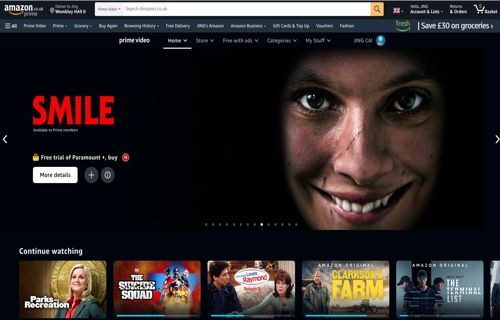

In [40]:
amazon = Image.open("/Users/lexicai/Desktop/Python Learning/Project/DA/image.png")
amazon.resize((500,320))

In [3]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_csv("/Users/lexicai/Desktop/Python Learning/Project/DA/amazon_prime_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


### Dataset Preparation
* Load the dataset
* Add new features in the dataset
* Rename the titles of some columns

In [5]:
# Convert 'date_added' to datetime type

df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

# Set "show_id" as an index
df.set_index("show_id", inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
show_id,,,,,,,,,,,,,
s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021.0,3.0
s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021.0,3.0
s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021.0,3.0
s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021.0,3.0
s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021.0,3.0


### Rename "listed_in" to "genre"

In [6]:
mapper = {"listed_in": "genre"}
df.rename(columns=mapper, inplace=True)

#### Dataframe Info

In [7]:
# Summarize information in a dataset

print(f"The size of Amazon Prime data is {df.shape}.")

The size of Amazon Prime data is (9668, 13).


In [8]:
# Summarize the dataset columns and Dtype
print("-"*70)
print("The general information about Amazon Prime dataset is shown below:")
print("-"*70)
df.info()

----------------------------------------------------------------------
The general information about Amazon Prime dataset is shown below:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, s1 to s9668
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      7586 non-null   object        
 3   cast          8435 non-null   object        
 4   country       672 non-null    object        
 5   date_added    155 non-null    datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9331 non-null   object        
 8   duration      9668 non-null   object        
 9   genre         9668 non-null   object        
 10  description   9668 non-null   object        
 11  year_added    155 non-null    fl

In [9]:
# Show the index of dataset

print("-"*55)
print("The column about Amazon Prime dataset is shown below:")
print("-"*55)
df.columns

-------------------------------------------------------
The column about Amazon Prime dataset is shown below:
-------------------------------------------------------


Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [10]:
# Statistical information
print("-"*60)
print("Statistical information about given dataset is shown below:")
print("-"*60)
df.describe().round(1)

------------------------------------------------------------
Statistical information about given dataset is shown below:
------------------------------------------------------------


,release_year,year_added,month_added
count,9668.0,155.0,155.0
mean,2008.3,2021.0,6.9
std,18.9,0.0,2.2
min,1920.0,2021.0,3.0
25%,2007.0,2021.0,5.0
50%,2016.0,2021.0,7.0
75%,2019.0,2021.0,9.0
max,2021.0,2021.0,10.0


## Data Cleaning

### Find Missing Values:

In [11]:
for i in range(len(df.isna().sum())):
    if df.isna().sum()[i] > 0:
        print('Total Number of missing values in ' + df.isna().sum().index[i] + ':',df.isna().sum()[i])

Total Number of missing values in director: 2082
Total Number of missing values in cast: 1233
Total Number of missing values in country: 8996
Total Number of missing values in date_added: 9513
Total Number of missing values in rating: 337
Total Number of missing values in year_added: 9513
Total Number of missing values in month_added: 9513


### Handling Missing Data
* Drop the missing values

#### Drop Null Values

In [12]:
data = df.dropna()
df.isnull().sum()

type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
genre              0
description        0
year_added      9513
month_added     9513
dtype: int64

#### Check Duplicates

In [13]:
print("\nCheck Duplicates")
print('-' * 50)
print('Total Duplicates values: ',df.duplicated().sum())


Check Duplicates
--------------------------------------------------
Total Duplicates values:  0


#### Rating:

In [14]:
# There are 24 different ratings excluding Nan value

df["rating"].nunique()

24

In [15]:
# Following info shows numbers based on different ratings

df["rating"].value_counts()

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

## Let's begin with EDA!

### 1. Top Five Rating Category

In [16]:
top_five = df["rating"].value_counts().head()
top_five

13+    2117
16+    1547
ALL    1268
18+    1243
R      1010
Name: rating, dtype: int64

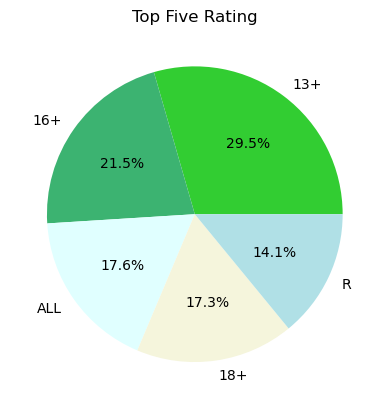

In [17]:
colors = ["limegreen","mediumseagreen","lightcyan","beige","powderblue"]
plt.title("Top Five Rating")
plt.pie(top_five, labels=top_five.index, colors = colors, autopct='%1.1f%%')
plt.show()

### 2. Content Type on Amazon Prime

In [18]:
content_types = df["type"].value_counts()
content_types

Movie      7814
TV Show    1854
Name: type, dtype: int64

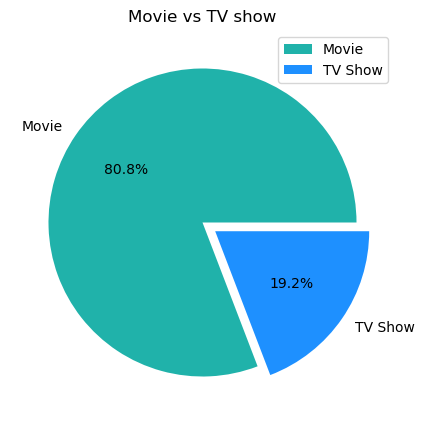

In [19]:
colors=["lightseagreen","dodgerblue"]
plt.figure(figsize=(5,5))
plt.title("Movie vs TV show")
plt.pie(content_types,labels=content_types.index, autopct="%1.1f%%", colors=colors, explode=(0,0.1))
plt.legend()
plt.show()

### 3. Top Five Directors

In [20]:
top_directors = df["director"].value_counts().head()
top_directors

Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: director, dtype: int64

<BarContainer object of 5 artists>

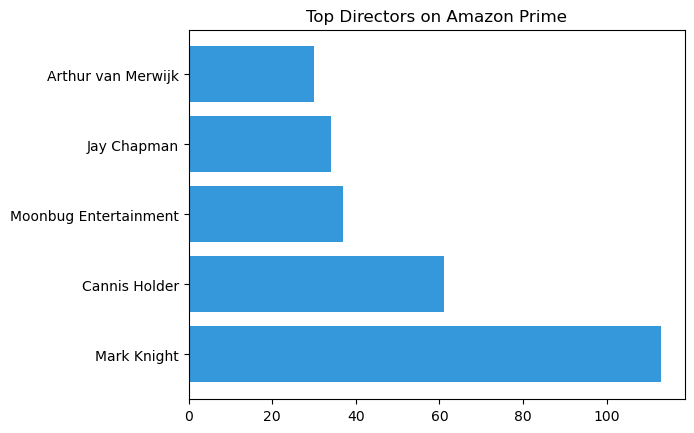

In [21]:
plt.title("Top Directors on Amazon Prime")
plt.barh(top_directors.index.values,top_directors, color="#3498db")

#### Top Five Directors and the Genres they make

In [22]:
df[["director","genre"]].value_counts().head()

director               genre                                                     
Mark Knight            Special Interest                                              60
Cannis Holder          Kids                                                          59
Moonbug Entertainment  Kids                                                          35
Jay Chapman            Arts, Entertainment, and Culture, Comedy, Special Interest    32
Arthur van Merwijk     Animation, Kids                                               28
dtype: int64

### 4. Countries with the highest amount of production

In [23]:
top_producing_countries = df["country"].value_counts().head(8)
top_producing_countries

United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Spain                              8
Italy                              8
Canada, United States              7
Name: country, dtype: int64

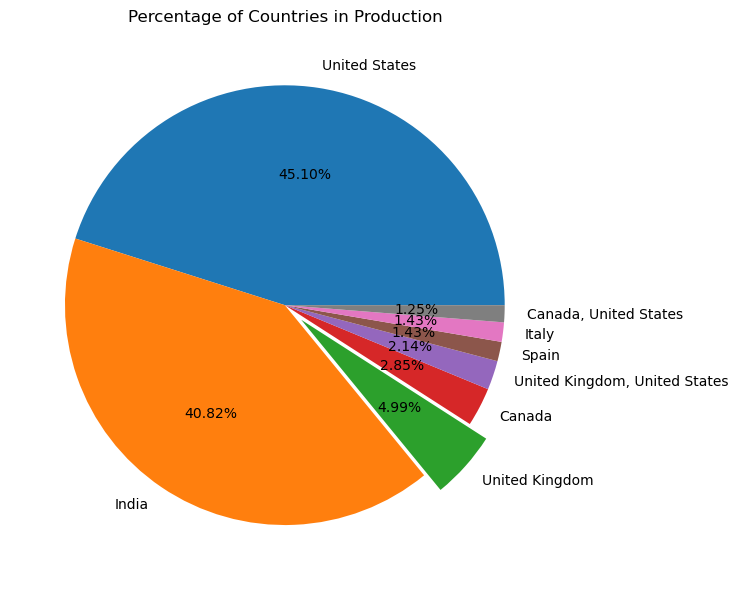

In [24]:
plt.figure(figsize=(8, 6))
plt.pie(x=top_producing_countries.values, 
        labels=top_producing_countries.index, 
        autopct='%.2f%%',
       explode=(0,0,0.1,0,0,0,0,0))
plt.title('Percentage of Countries in Production')
plt.tight_layout()
plt.show()

### 5. The most commonly produced genres:

In [25]:
most_produced_genres = df["genre"].value_counts().head(10)
most_produced_genres

Drama                            986
Comedy                           536
Drama, Suspense                  399
Comedy, Drama                    377
Animation, Kids                  356
Documentary                      350
Kids                             334
Action, Drama                    297
Documentary, Special Interest    296
TV Shows                         263
Name: genre, dtype: int64

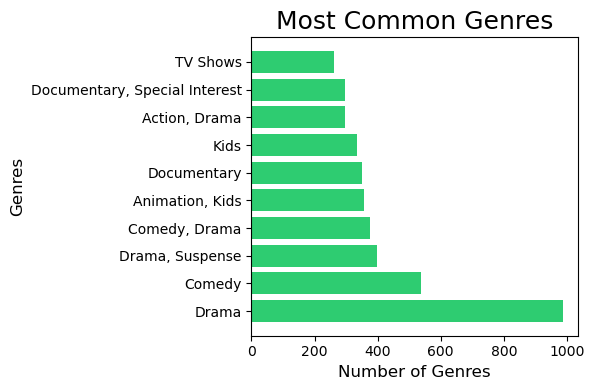

In [26]:
plt.figure(figsize=(6,4))
plt.barh(most_produced_genres.index.values, most_produced_genres, color="#2ecc71")
plt.title("Most Common Genres", fontsize=18)
plt.ylabel("Genres", fontsize=12)
plt.xlabel("Number of Genres", fontsize=12)
plt.tight_layout()

#### Since the United States is the top country to produce shows and movies, and drama is the most popular genre, we will explore the information about drama is produced by United States by release years.

In [27]:
# All the drama only released in US.

drama = df[df["genre"] == "Drama"]
drama[drama["country"]=="United States"].sort_values("release_year", ascending=False)

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
show_id,,,,,,,,,,,,,
s405,TV Show,The Underground Railroad,NaN,"Thuso Mbedu, Joel Edgerton, Chase W. Dillon, W...",United States,NaT,2021,TV-MA,1 Season,Drama,Coming soon to Prime Video: May 14. The Underg...,NaN,NaN
s5652,Movie,One Night in Miami...,Regina King,"Kingsley Ben-Adir, Eli Goree, Aldis Hodge, ...",United States,NaT,2021,R,114 min,Drama,One Night in Miami is a fictional account of o...,NaN,NaN
s5785,Movie,Sound of Metal,Darius Marder,"Riz Ahmed, Olivia Cooke, Paul Raci, Lauren Rid...",United States,NaT,2020,R,121 min,Drama,Metal drummer Ruben begins to lose his hearing...,NaN,NaN
s5152,Movie,I'm Your Woman,Julia Hart,"Rachel Brosnahan, Marsha Stephanie Blake, Arin...",United States,NaT,2020,R,120 min,Drama,"In this 1970s set crime drama, a woman is forc...",NaN,NaN
s4470,Movie,Chemical Hearts,Richard Tanne,"Lili Reinhart, Austin Abrams",United States,NaT,2020,R,93 min,Drama,When a hopelessly romantic high school senior ...,NaN,NaN
s3592,Movie,The Goldfinch,John Crowley,"Ansel Elgort, Oakes Fegley, Aneurin Barnard, F...",United States,NaT,2019,R,149 min,Drama,Tragedy changes Theodore Decker's life after h...,NaN,NaN
s3737,Movie,The Last Black Man in San Francisco,Joe Talbot,"Jimmie Fails, Jonathan Majors, Danny Glover, F...",United States,NaT,2019,R,121 min,Drama,Jimmie and his best friend Mont try to reclaim...,NaN,NaN
s966,TV Show,Sneaky Pete,NaN,"Libe Barer, Marin Ireland, Shane McRae, Peter ...",United States,NaT,2019,18+,3 Seasons,Drama,Who is Marius Josipovic? Marius himself would ...,NaN,NaN
s465,TV Show,The Romanoffs,NaN,"Jack Huston, Paul Reiser, Diane Lane, Christin...",United States,NaT,2018,16+,1 Season,Drama,"From the creator of Mad Men, The Romanoffs is ...",NaN,NaN


#### Some of the oldest movies on Amazon Prime

In [28]:
old = df.sort_values("release_year", ascending = False)
old = old[old['type'] == "Movie"]
old[['title', "release_year","director"]].tail(10)

,title,release_year,director
show_id,,,
s486,The Phantom of the Opera (Silent),1925,Rupert Julian
s6628,Sir Arthur Conan Doyle's The Lost World,1925,Harry O. Hoyt
s8591,Tumbleweeds,1925,King Baggot
s1135,Romola,1924,Henry King
s1685,Merry-Go-Round,1923,"Rupert Julian, Eric von Stroheim"
s1144,Robin Hood (Silent),1922,Allan Dwan
s1426,One Exciting Night,1922,D.W. Griffith
s1285,Pollyanna,1920,Paul Powell
s1475,Nomads Of The North,1920,David Hartford


#### Some of the oldest TV shows on Amazon Prime

In [29]:
old_show = df.sort_values("release_year", ascending = False)
old_show = old_show[old_show['type'] == "TV Show"]
old_show[['title', "release_year"]].tail(10)

,title,release_year
show_id,,
s7997,The Californians,1959
s57,Yancy Derringer,1959
s130,What's My Line?,1955
s1862,Life with Elizabeth,1954
s1530,Napoleon Hill's Master Key,1954
s9081,The Best of I Love Lucy,1954
s3143,Basil Rathbone Sherlock Holmes in Color!,1946
s1995,Jungle Queen: 2K Restored Special Edition,1945
s744,The Best of The Three Stooges in Color!,1936


### 6. Which month has added most contents to Amazon Prime?

In [30]:
a = df["date_added"].dt.month.value_counts().sort_index()
a

3.0     14
4.0     15
5.0     12
6.0     26
7.0     16
8.0     24
9.0     29
10.0    19
Name: date_added, dtype: int64

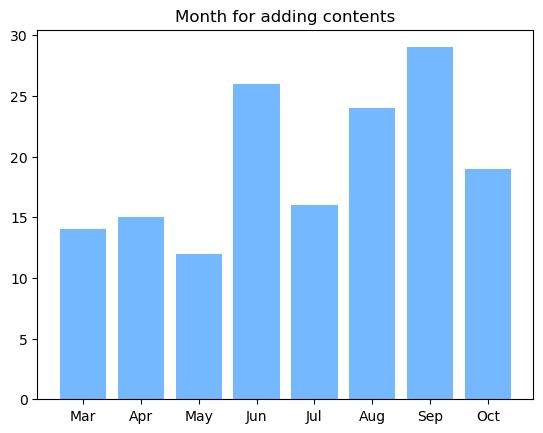

In [31]:
a = df["date_added"].dt.month.value_counts().sort_index()
plt.title("Month for adding contents")
plt.bar(a.index.values, a,color='#74b9ff')
plt.xticks([3,4,5,6,7,8,9,10],["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"])
plt.show()